# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        query_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
        city_weather = requests.get(query_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | tanrake village
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | mayya
Processing Record 5 of Set 1 | saipan
Processing Record 6 of Set 1 | floro
Processing Record 7 of Set 1 | cherepovets
Processing Record 8 of Set 1 | ust'-ordynskiy
Processing Record 9 of Set 1 | gadzhiyevo
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | erenhot
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | ravar
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.58,63,3,2.49,SH,1729042721
1,port-aux-francais,-49.3500,70.2167,0.92,66,74,16.03,TF,1729042723
2,mayya,61.7333,130.2811,-2.22,74,50,1.44,RU,1729042724
3,saipan,15.1355,145.7010,30.39,79,40,0.00,MP,1729042725
4,floro,61.5996,5.0328,9.98,71,100,9.26,NO,1729042726


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.58,63,3,2.49,SH,1729042721
1,port-aux-francais,-49.3500,70.2167,0.92,66,74,16.03,TF,1729042723
2,mayya,61.7333,130.2811,-2.22,74,50,1.44,RU,1729042724
3,saipan,15.1355,145.7010,30.39,79,40,0.00,MP,1729042725
4,floro,61.5996,5.0328,9.98,71,100,9.26,NO,1729042726


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

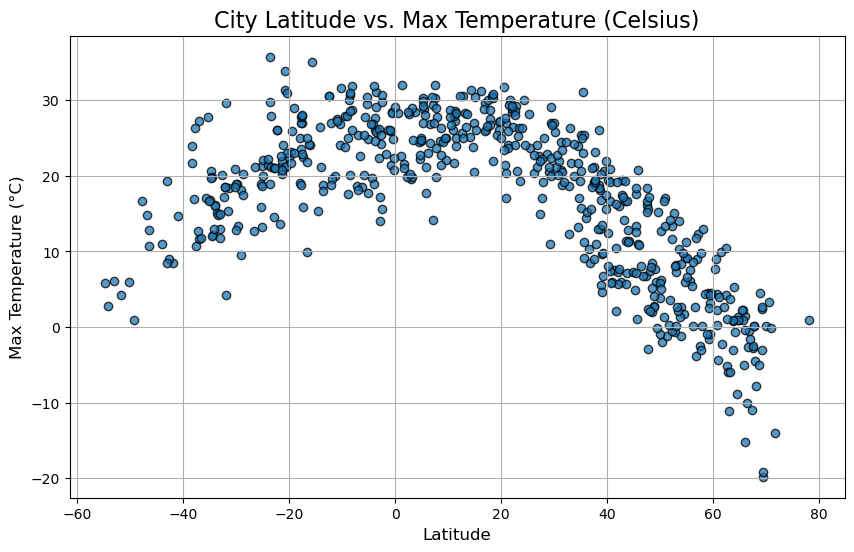

In [16]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Celsius)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

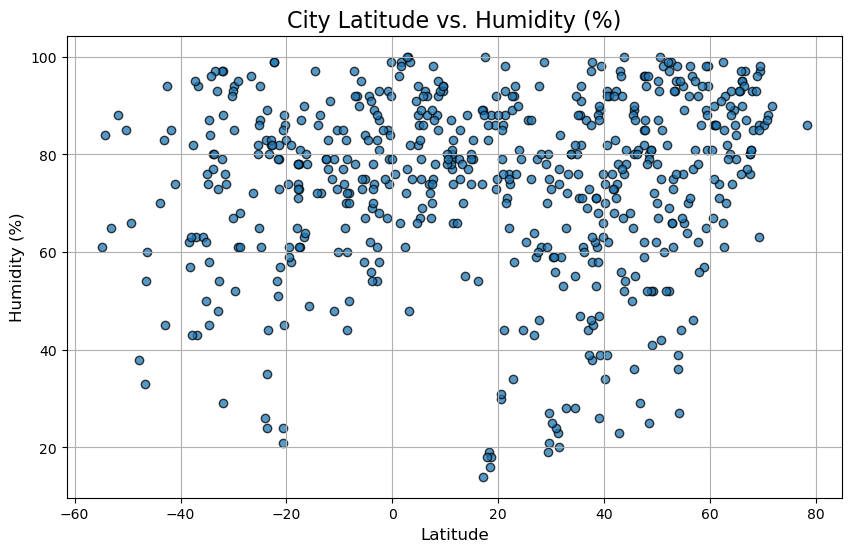

In [17]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

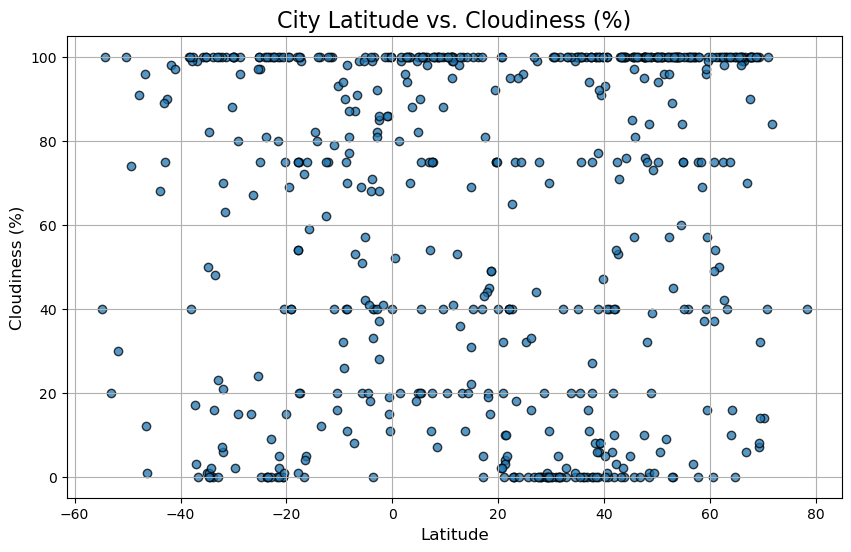

In [18]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

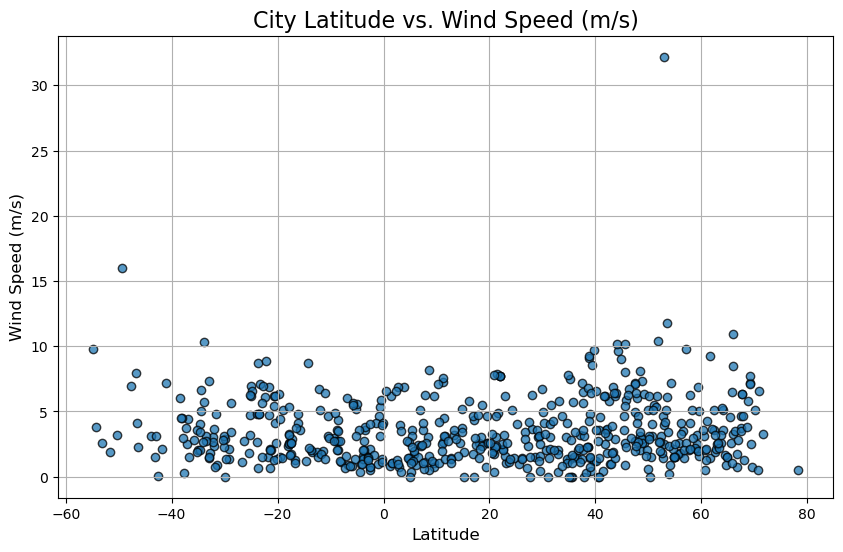

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
     regress_values = x_values * slope + intercept
     plt.scatter(x_values, y_values)
     plt.plot(x_values, regress_values, "r-")
     plt.title(title, fontsize=16)
     plt.xlabel(xlabel, fontsize=12)
     plt.ylabel(ylabel, fontsize=12)
     plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=12, color="red")
     plt.annotate(f"R² = {rvalue**2:.2f}", (min(x_values), max(y_values)), fontsize=12, color="red")
     plt.grid(True)
     plt.show()
     


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mayya,61.7333,130.2811,-2.22,74,50,1.44,RU,1729042724
3,saipan,15.1355,145.7010,30.39,79,40,0.00,MP,1729042725
4,floro,61.5996,5.0328,9.98,71,100,9.26,NO,1729042726
5,cherepovets,59.1333,37.9000,4.53,89,96,3.20,RU,1729042727
6,ust'-ordynskiy,52.8050,104.7508,-0.71,66,89,1.42,RU,1729042728


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.58,63,3,2.49,SH,1729042721
1,port-aux-francais,-49.3500,70.2167,0.92,66,74,16.03,TF,1729042723
9,puerto natales,-51.7236,-72.4875,4.30,88,30,1.89,CL,1729042732
12,ancud,-41.8697,-73.8203,8.47,85,98,2.09,CL,1729042735
16,waitangi,-43.9535,-176.5597,11.01,70,68,3.13,NZ,1729042740


###  Temperature vs. Latitude Linear Regression Plot

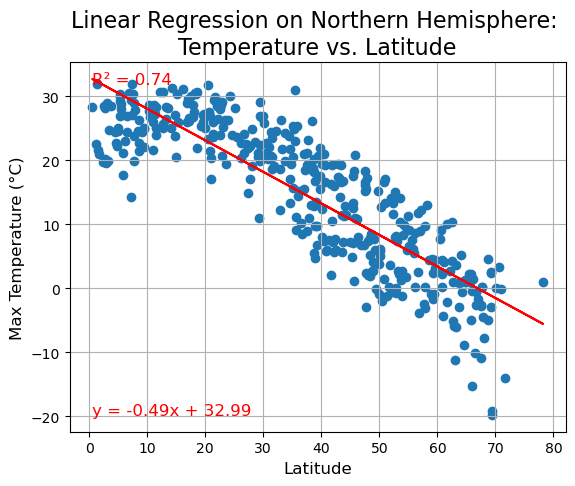

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere: \nTemperature vs. Latitude", 
                       "Latitude", 
                       "Max Temperature (°C)")

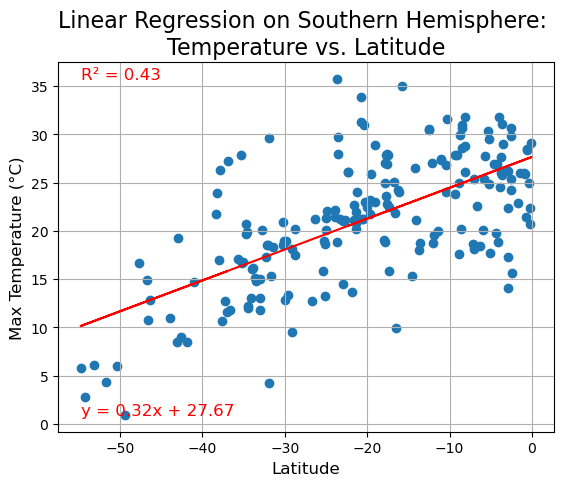

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere: \nTemperature vs. Latitude", 
                       "Latitude", 
                       "Max Temperature (°C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

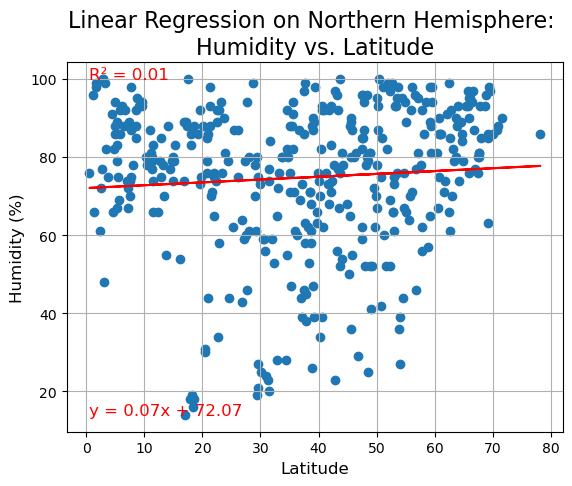

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere: \nHumidity vs. Latitude", 
                       "Latitude", 
                       "Humidity (%)")

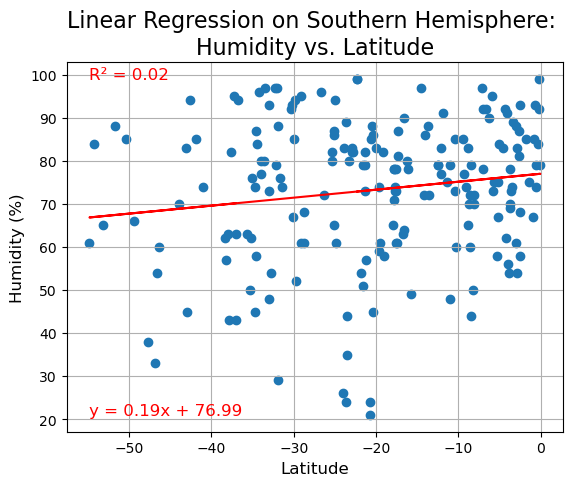

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere: \nHumidity vs. Latitude", 
                       "Latitude", 
                       "Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

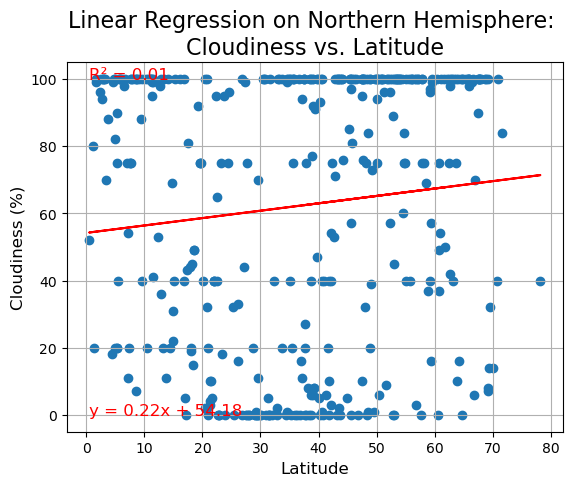

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere: \nCloudiness vs. Latitude", 
                       "Latitude", 
                       "Cloudiness (%)")

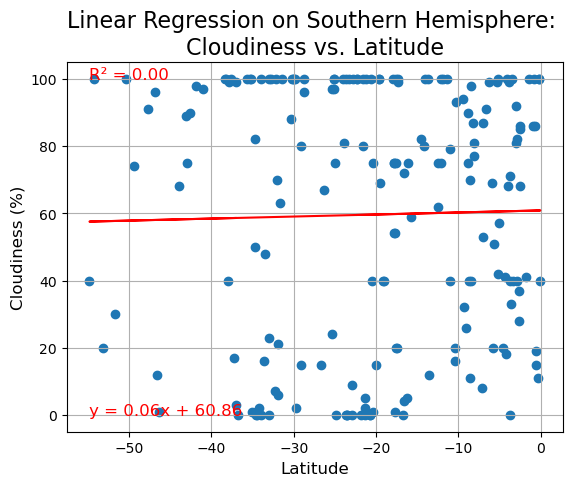

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere: \nCloudiness vs. Latitude", 
                       "Latitude", 
                       "Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

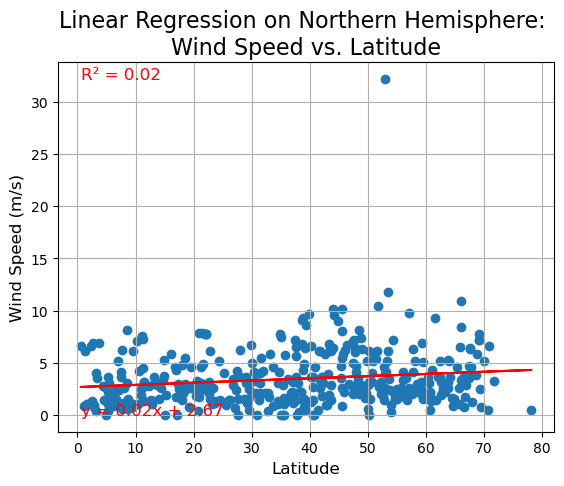

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere: \nWind Speed vs. Latitude", 
                       "Latitude", 
                       "Wind Speed (m/s)")

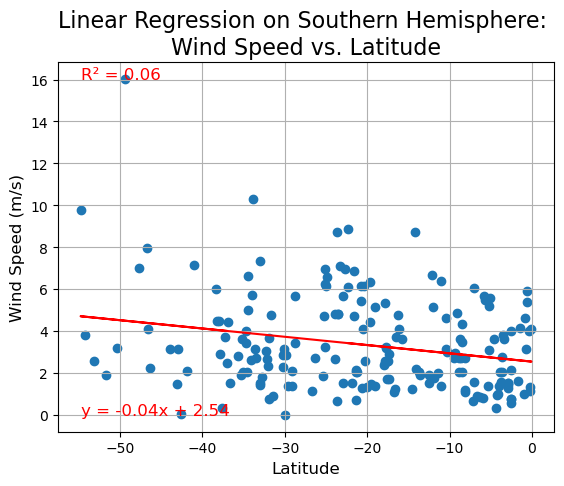

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere: \nWind Speed vs. Latitude", 
                       "Latitude", 
                       "Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

1. Temperature vs. Latitude:
Northern Hemisphere: The results show a negative relationship between temperature and latitude. As you move farther from the equator, temperatures tend to drop. The strong correlation and high R² value confirm that latitude is a key factor in explaining temperature variation.

Southern Hemisphere: In the Southern Hemisphere, the pattern is reversed. As you move closer to the equator, temperatures rise. The relationship between temperature and latitude is also strong.

2. Humidity vs. Latitude:
Northern Hemisphere: The relationship between humidity and latitude is weak. This tells us that humidity is not strongly dependent on how far north or south you are.

Southern Hemisphere: The same is true for the Southern Hemisphere. Latitude doesn't explain much about humidity here either, so while there might be some trends, it's not enough to show a strong correlation.

3. Cloudiness vs. Latitude:
Northern Hemisphere: There’s no clear trend between latitude and cloudiness. Cloud cover seems to be random and not really affected by how far north or south you are.

Southern Hemisphere: Similarly, in the Southern Hemisphere, cloudiness doesn’t seem to follow any strong pattern based on latitude. The low R² values in both hemispheres suggest that cloudiness is more unpredictable.

4. Wind Speed vs. Latitude:
Northern Hemisphere: There’s a slight positive trend for wind speed, meaning wind speeds tend to increase a bit as you move toward higher latitudes. The effect is small, and the low R² value shows it’s not a major factor.

Southern Hemisphere: In the Southern Hemisphere, the trend is similar, with only a slight increase in wind speeds as you move south, but again, latitude doesn’t explain much about wind speeds overall.